<a href="https://colab.research.google.com/github/sckgn/FinalYearProject_ML/blob/main/10_foldCVMixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Data**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
asd_2018_df = pd.read_csv('dataset_2018.csv')

## **Data Preparation**

In [3]:
asd_2018_df.rename(columns={'Class/ASD Traits ':'ASD_Traits'}, inplace=True)

In [4]:
mixed = asd_2018_df.drop(['Case_No', 'Qchat-10-Score','Who completed the test','Ethnicity'], axis=1)

### **Duplicate samples**

In [8]:
duplicated = mixed[mixed.duplicated()] 

In [10]:
duplicated['Sex'].value_counts()

m    99
f    44
Name: Sex, dtype: int64

In [11]:
no_dup = mixed.drop_duplicates()

In [13]:
no_dup['Sex'].value_counts()

m    636
f    275
Name: Sex, dtype: int64

### **Train-test split**

In [14]:
from sklearn.model_selection import train_test_split

X = mixed.drop("ASD_Traits", axis=1)
y = mixed["ASD_Traits"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
X_nd = no_dup.drop("ASD_Traits", axis=1)
y_nd = no_dup["ASD_Traits"]

X_nd_train, X_nd_test, y_nd_train, y_nd_test = train_test_split(X_nd, y_nd, test_size=0.3, random_state=42, stratify=y_nd)

### **Data pre-processing**

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OrdinalEncoder()
y_encoder = LabelEncoder()
scaler = MinMaxScaler()

age = ['Age_Mons']
char_vals = ['Jaundice','Family_mem_with_ASD','Sex']
target = ['ASD_Traits']

In [17]:
X_train[age] = scaler.fit_transform(X_train[age].values.reshape(-1,1))
X_test[age] = scaler.transform(X_test[age].values.reshape(-1,1))
for c in char_vals:
  X_train[c] = encoder.fit_transform(X_train[c].values.reshape(-1,1))
  X_test[c] = encoder.transform(X_test[c].values.reshape(-1,1))
y_train = y_encoder.fit_transform(y_train.values.ravel())
y_test = y_encoder.transform(y_test.values.ravel())

In [18]:
X_nd_train[age] = scaler.fit_transform(X_nd_train[age].values.reshape(-1,1))
X_nd_test[age] = scaler.transform(X_nd_test[age].values.reshape(-1,1))
for c in char_vals:
  X_nd_train[c] = encoder.fit_transform(X_nd_train[c].values.reshape(-1,1))
  X_nd_test[c] = encoder.transform(X_nd_test[c].values.reshape(-1,1))
y_nd_train = y_encoder.fit_transform(y_nd_train.values.ravel())
y_nd_test = y_encoder.transform(y_nd_test.values.ravel())

In [19]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

metrics ={'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall' : make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)}

### **Evaluation functions**

In [20]:
from sklearn.model_selection import cross_validate

def cross_validation_results(model, predictors, target):
  results = cross_validate(model, predictors, target, scoring = metrics, return_train_score=False, cv=10)

  print("Mean Test Precision: ", results['test_precision'].mean())
  print("Mean Test Recall: ", results['test_recall'].mean())
  print("Mean Test F1: ", results['test_f1_score'].mean())
  print("Accuracy: ", results['test_accuracy'].mean())
  ConfusionMatrixDisplay.from_estimator(model, predictors, target)

In [21]:
def evaluate_on_test(model, predictors, target):
  predictions = model.predict(predictors)
  print("Accuracy: ", accuracy_score(target, predictions))
  print("Precision: ", precision_score(target, predictions))
  print("Recall: ", recall_score(target, predictions))
  print("F1: ", f1_score(target, predictions))
  ConfusionMatrixDisplay.from_predictions(target, predictions)

## **Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1.0,random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


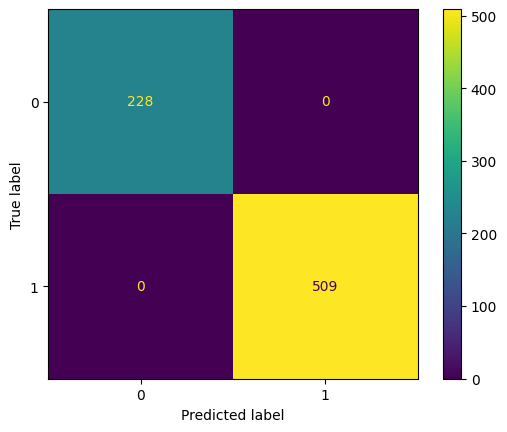

In [23]:
cross_validation_results(log_reg, X_train, y_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


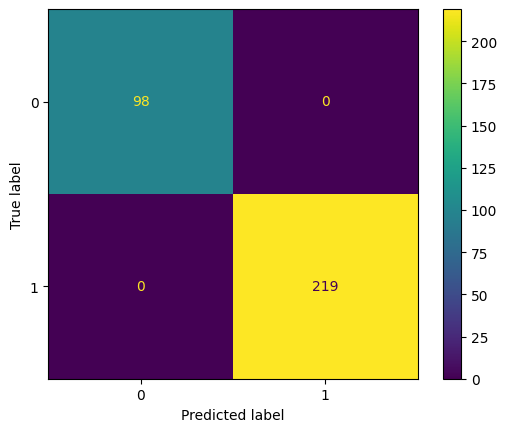

In [24]:
evaluate_on_test(log_reg, X_test,y_test)

## **No Duplicates**

In [25]:
nd_lr = LogisticRegression(random_state=42)
nd_lr.fit(X_nd_train, y_nd_train)

LogisticRegression(random_state=42)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


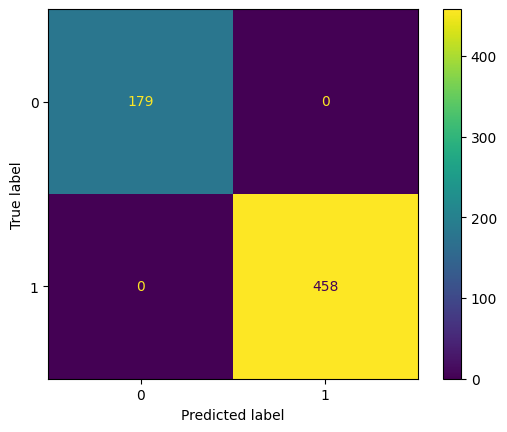

In [26]:
cross_validation_results(nd_lr, X_nd_train, y_nd_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


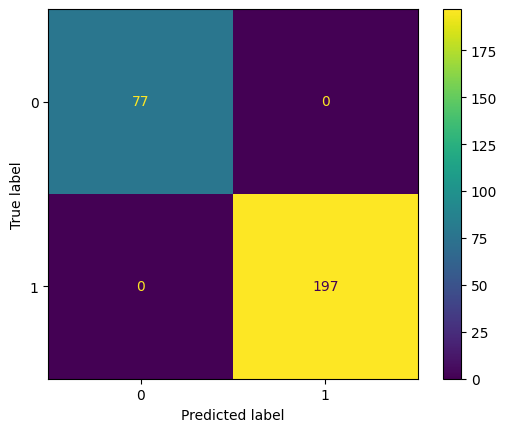

In [27]:
evaluate_on_test(nd_lr, X_nd_test, y_nd_test)

## **AdaBoost**

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(learning_rate=1.0, n_estimators=50,random_state=42)

ada = ada.fit(X_train, y_train)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


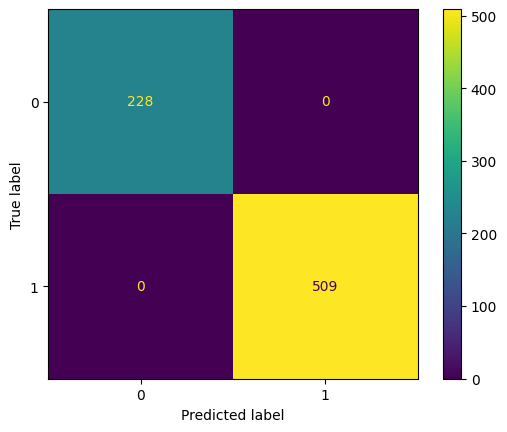

In [21]:
cross_validation_results(ada, X_train, y_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


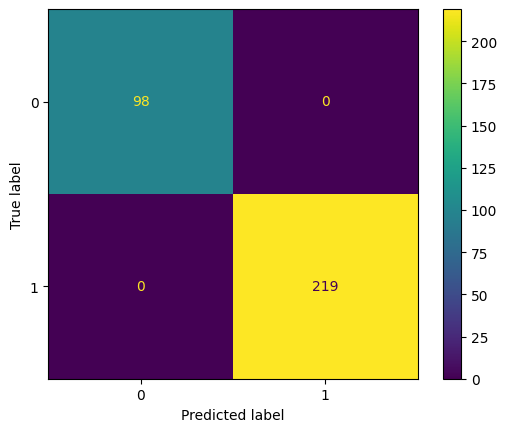

In [22]:
evaluate_on_test(ada, X_test, y_test)

### **No fine tuning**

In [27]:
ada_nf = AdaBoostClassifier(random_state=42)
ada_nf = ada_nf.fit(X_train,y_train)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


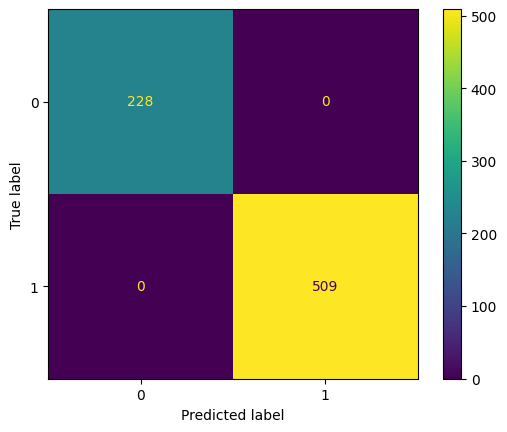

In [28]:
cross_validation_results(ada_nf, X_train, y_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


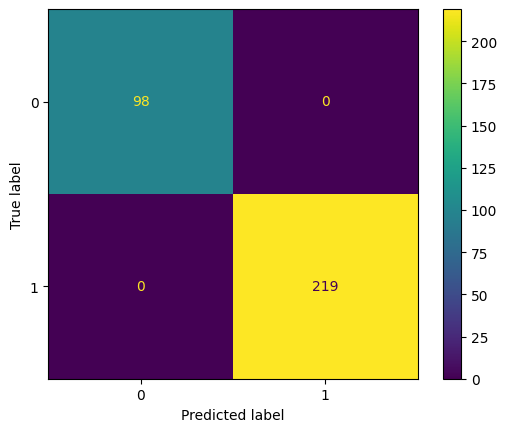

In [29]:
evaluate_on_test(ada_nf, X_test, y_test)

## **SVC**

In [23]:
from sklearn.svm import SVC

svc = SVC(C=10, gamma=0.1,kernel='rbf', random_state=42)

svc = svc.fit(X_train,y_train)

Mean Test Precision:  1.0
Mean Test Recall:  1.0
Mean Test F1:  1.0
Accuracy:  1.0


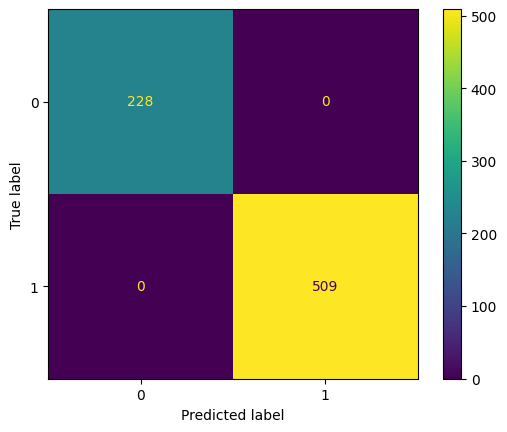

In [24]:
cross_validation_results(svc, X_train, y_train)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


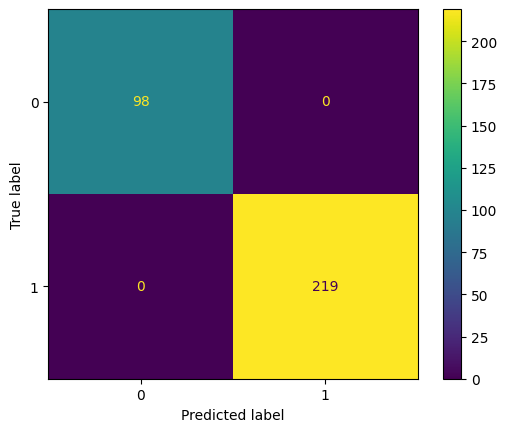

In [25]:
evaluate_on_test(svc, X_test, y_test)

### **No fine tuning**

In [46]:
svc_nf = SVC(random_state=42)

svc_nf.fit(X_train, y_train)

SVC(random_state=42)

Mean Test Precision:  0.9809800601421023
Mean Test Recall:  0.994078431372549
Mean Test F1:  0.987375489223005
Accuracy:  0.982413920770085


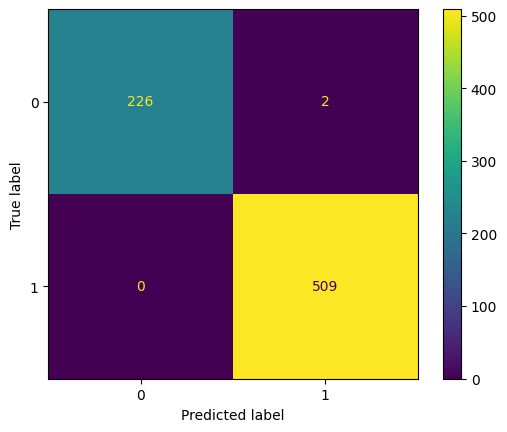

In [47]:
cross_validation_results(svc_nf, X_train, y_train)

Accuracy:  0.9873817034700315
Precision:  0.9908675799086758
Recall:  0.9908675799086758
F1:  0.9908675799086758


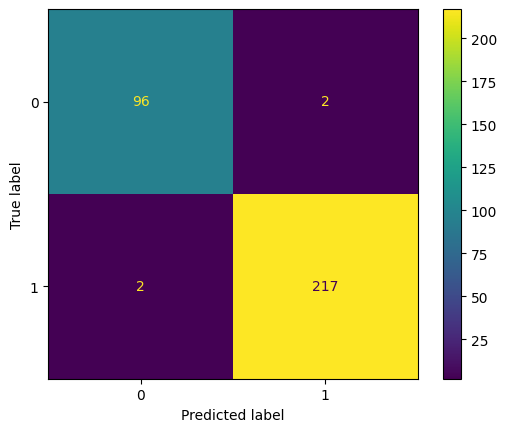

In [48]:
evaluate_on_test(svc_nf, X_test, y_test)